In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load data with pandas

In [28]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/drive/MyDrive/Colab/Magnite/Dataset.csv')
data.head()

,date,site_id,ad_type_id,geo_id,device_category_id,advertiser_id,order_id,line_item_type_id,os_id,integration_type_id,monetization_channel_id,ad_unit_id,total_impressions,total_revenue,viewable_impressions,measurable_impressions,revenue_share_percent
0,2019-06-30 00:00:00,351,10,187,2,84,3473,19,60,1,4,5174,16,0.0,2,16,1
1,2019-06-30 00:00:00,351,10,187,2,84,3473,19,58,1,4,5174,6,0.0,0,6,1
2,2019-06-30 00:00:00,351,10,147,2,84,3473,19,60,1,4,5174,4,0.0,0,4,1
3,2019-06-30 00:00:00,351,10,147,2,84,3473,19,58,1,4,5174,4,0.0,0,4,1
4,2019-06-30 00:00:00,348,10,147,3,79,3463,20,59,1,19,5138,4,0.0,0,4,1


In [29]:
data.isnull().sum()

date                       0
site_id                    0
ad_type_id                 0
geo_id                     0
device_category_id         0
advertiser_id              0
order_id                   0
line_item_type_id          0
os_id                      0
integration_type_id        0
monetization_channel_id    0
ad_unit_id                 0
total_impressions          0
total_revenue              0
viewable_impressions       0
measurable_impressions     0
revenue_share_percent      0
dtype: int64

## Load data with pyspark

In [30]:
!pip install pyspark

In [31]:
# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum, avg

# Initialize a Spark session
spark = SparkSession.builder.appName("magnite").getOrCreate()

# Read the CSV file into a Spark DataFrame
data = spark.read.csv("/content/drive/MyDrive/Colab/Magnite/Dataset.csv", header=True, inferSchema=True)

In [32]:
data.show()

+-------------------+-------+----------+------+------------------+-------------+--------+-----------------+-----+-------------------+-----------------------+----------+-----------------+-------------+--------------------+----------------------+---------------------+
|               date|site_id|ad_type_id|geo_id|device_category_id|advertiser_id|order_id|line_item_type_id|os_id|integration_type_id|monetization_channel_id|ad_unit_id|total_impressions|total_revenue|viewable_impressions|measurable_impressions|revenue_share_percent|
+-------------------+-------+----------+------+------------------+-------------+--------+-----------------+-----+-------------------+-----------------------+----------+-----------------+-------------+--------------------+----------------------+---------------------+
|2019-06-30 00:00:00|    351|        10|   187|                 2|           84|    3473|               19|   60|                  1|                      4|      5174|               16|          0.0

In [33]:
data.columns

['date',
 'site_id',
 'ad_type_id',
 'geo_id',
 'device_category_id',
 'advertiser_id',
 'order_id',
 'line_item_type_id',
 'os_id',
 'integration_type_id',
 'monetization_channel_id',
 'ad_unit_id',
 'total_impressions',
 'total_revenue',
 'viewable_impressions',
 'measurable_impressions',
 'revenue_share_percent']

In [34]:
data.printSchema()

root
 |-- date: timestamp (nullable = true)
 |-- site_id: integer (nullable = true)
 |-- ad_type_id: integer (nullable = true)
 |-- geo_id: integer (nullable = true)
 |-- device_category_id: integer (nullable = true)
 |-- advertiser_id: integer (nullable = true)
 |-- order_id: integer (nullable = true)
 |-- line_item_type_id: integer (nullable = true)
 |-- os_id: integer (nullable = true)
 |-- integration_type_id: integer (nullable = true)
 |-- monetization_channel_id: integer (nullable = true)
 |-- ad_unit_id: integer (nullable = true)
 |-- total_impressions: integer (nullable = true)
 |-- total_revenue: double (nullable = true)
 |-- viewable_impressions: integer (nullable = true)
 |-- measurable_impressions: integer (nullable = true)
 |-- revenue_share_percent: integer (nullable = true)



## Aggregation 1: total impressions by Site and Ad Type

In [36]:
# Perform transformations
# Calculate the total impressions by Site and Ad Type
total_impressions_df = data.groupBy( "ad_type_id").agg(sum("total_impressions").alias("total_impressions_site_ad_type"))
total_impressions_sorted = total_impressions_df.orderBy(col("total_impressions_site_ad_type").desc())

# Show the results
total_impressions_sorted.show()

+----------+------------------------------+
|ad_type_id|total_impressions_site_ad_type|
+----------+------------------------------+
|        10|                      18555546|
|        17|                        547226|
+----------+------------------------------+



## Aggregation 2: average revenue per advertiser

In [8]:
# Calculate the average revenue per advertiser
avg_revenue_per_advertiser_df = data.groupBy("advertiser_id").agg(avg("total_revenue").alias("avg_advertiser_revenue"))
avg_revenue_per_advertiser_sorted = avg_revenue_per_advertiser_df.orderBy(col("avg_advertiser_revenue").desc())
# Show the results
avg_revenue_per_advertiser_sorted.show()

+-------------+----------------------+
|advertiser_id|avg_advertiser_revenue|
+-------------+----------------------+
|           16|   0.23567251264755518|
|           79|   0.12601168226530113|
|            8|   0.11089768812747566|
|         2634|   0.07721419056922225|
|         2644|   0.05338987751328507|
|           90|   0.03736113539262396|
|           97|  0.029020448009688084|
|           96|   0.02788300705555148|
|           88|  0.025541126099706997|
|          139|  0.001433385376008...|
|           84|   5.78246902248738E-5|
|         2638|                   0.0|
|         2635|                   0.0|
|         2637|                   0.0|
|         2640|                   0.0|
|         2646|                   0.0|
|         2089|                   0.0|
|         2641|                   0.0|
|         2636|                   0.0|
|         2642|                   0.0|
+-------------+----------------------+
only showing top 20 rows



## Aggregation 3: Revenue Share by Monetization Channel:

In [38]:
data.show()

+-------------------+-------+----------+------+------------------+-------------+--------+-----------------+-----+-------------------+-----------------------+----------+-----------------+-------------+--------------------+----------------------+---------------------+
|               date|site_id|ad_type_id|geo_id|device_category_id|advertiser_id|order_id|line_item_type_id|os_id|integration_type_id|monetization_channel_id|ad_unit_id|total_impressions|total_revenue|viewable_impressions|measurable_impressions|revenue_share_percent|
+-------------------+-------+----------+------+------------------+-------------+--------+-----------------+-----+-------------------+-----------------------+----------+-----------------+-------------+--------------------+----------------------+---------------------+
|2019-06-30 00:00:00|    351|        10|   187|                 2|           84|    3473|               19|   60|                  1|                      4|      5174|               16|          0.0

In [9]:
# Calculate Revenue Share by Monetization Channel:
monetization_channel_revenue_share_df = data.groupBy("monetization_channel_id").agg(sum("revenue_share_percent").alias("monetization_channel_revenue_share"))
monetization_channel_revenue_share_sorted = monetization_channel_revenue_share_df.orderBy(col("monetization_channel_revenue_share").desc())
# Show the revenue share result
monetization_channel_revenue_share_sorted.show()

+-----------------------+----------------------------------+
|monetization_channel_id|monetization_channel_revenue_share|
+-----------------------+----------------------------------+
|                     19|                            396072|
|                      4|                            133282|
|                      1|                             28466|
|                      2|                              5144|
|                     21|                              4327|
+-----------------------+----------------------------------+



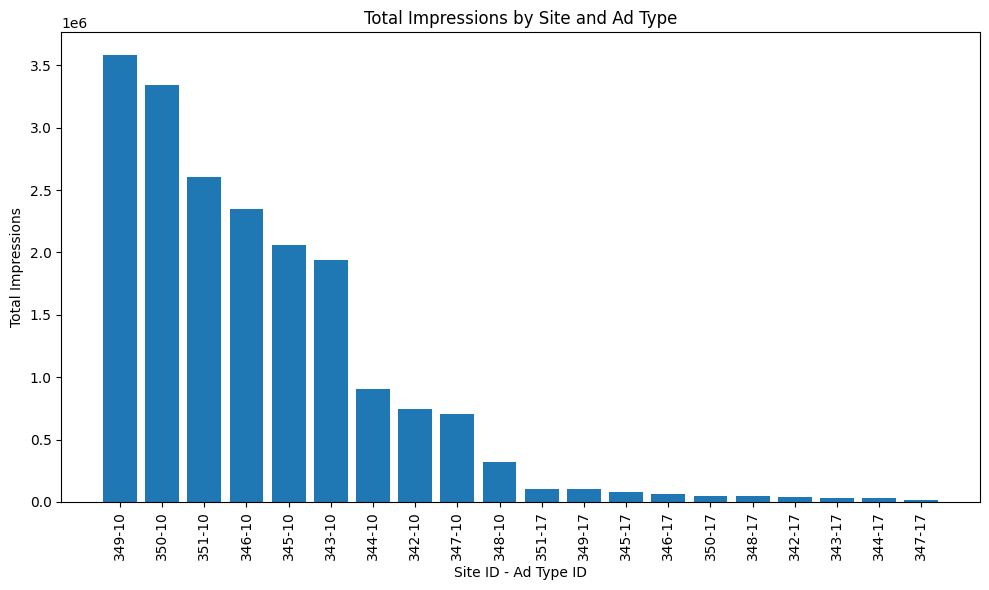

In [10]:
import matplotlib.pyplot as plt

# Convert total_impressions DataFrame to Pandas for visualization
total_impressions_pd = total_impressions_sorted.toPandas()

# Plot total impressions by Site and Ad Type
plt.figure(figsize=(10, 6))
plt.bar(total_impressions_pd['site_id'].astype(str) + "-" + total_impressions_pd['ad_type_id'].astype(str),
        total_impressions_pd['total_impressions_site_ad_type'])
plt.xlabel("Site ID - Ad Type ID")
plt.ylabel("Total Impressions")
plt.title("Total Impressions by Site and Ad Type")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## Time series analysis

Time Series Analysis Result:
         date  total_impressions  impressions_change
0  2019-06-01             486756                 0.0
1  2019-06-02             636942            150186.0
2  2019-06-03             712014             75072.0
3  2019-06-04             581034           -130980.0
4  2019-06-05             527132            -53902.0
5  2019-06-06             730188            203056.0
6  2019-06-07             625676           -104512.0
7  2019-06-08             502832           -122844.0
8  2019-06-09             684146            181314.0
9  2019-06-10             724370             40224.0
10 2019-06-11             569628           -154742.0
11 2019-06-12             470680            -98948.0
12 2019-06-13             833022            362342.0
13 2019-06-14             677686           -155336.0
14 2019-06-15             497594           -180092.0
15 2019-06-16             653302            155708.0
16 2019-06-17             808914            155612.0
17 2019-06-18    

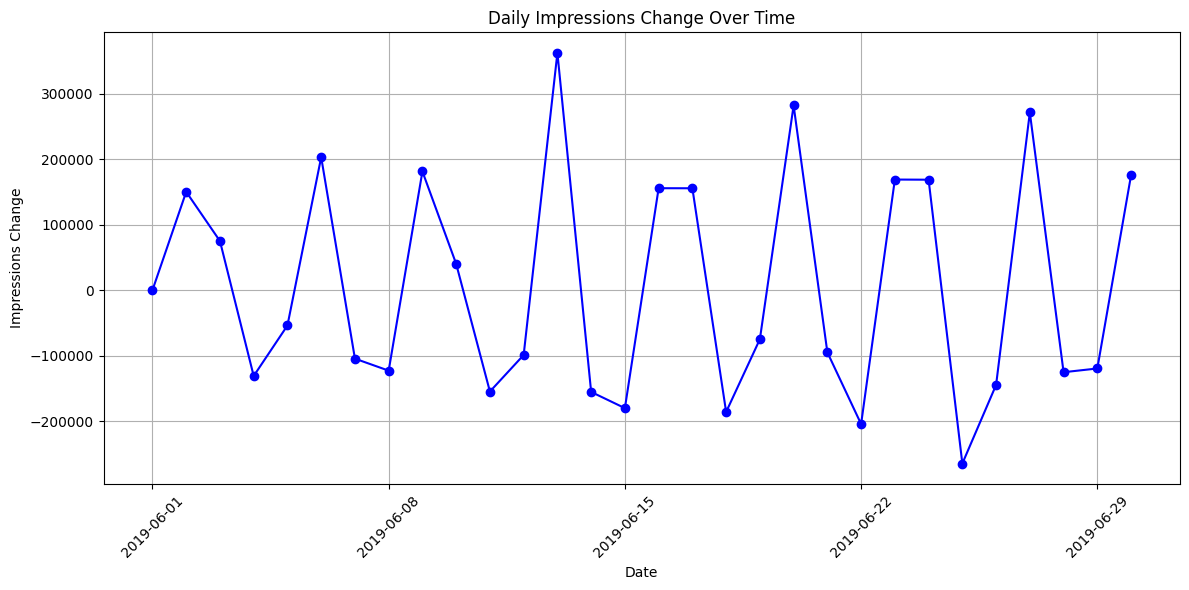

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def perform_time_series_analysis(data_file_path):
    # Read the CSV file into a Pandas DataFrame
    data = pd.read_csv(data_file_path)

    # Convert the date column to a proper date type
    data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')

    # Group by date and sum the chosen metric (impressions) over daily intervals
    daily_impressions_df = data.groupby('date')['total_impressions'].sum().reset_index()

    # Calculate daily changes in impressions
    daily_impressions_df['impressions_change'] = daily_impressions_df['total_impressions'].diff().fillna(0)

    # Show the result
    print("Time Series Analysis Result:")
    print(daily_impressions_df)

    # Visualize the time series data
    plt.figure(figsize=(12, 6))
    plt.plot(daily_impressions_df['date'], daily_impressions_df['impressions_change'], marker='o', linestyle='-', color='b')
    plt.xlabel("Date")
    plt.ylabel("Impressions Change")
    plt.title("Daily Impressions Change Over Time")
    # Customize the x-axis ticks to display every 7 days
    x_ticks = np.arange(daily_impressions_df['date'].min(), daily_impressions_df['date'].max(), pd.Timedelta(days=7))
    plt.xticks(x_ticks, rotation=45)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


data_file_path = '/content/drive/MyDrive/Colab/Magnite/Dataset.csv'
perform_time_series_analysis(data_file_path)
